In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
df = pd.read_csv("twitter_disaster (1).csv") 

In [211]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


# Data Cleaning:

In [214]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [218]:
df['keyword'] = df['keyword'].astype('category')
df['location'] = df['location'].astype('category')

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        7613 non-null   int64   
 1   keyword   7552 non-null   category
 2   location  5080 non-null   category
 3   text      7613 non-null   object  
 4   target    7613 non-null   int64   
dtypes: category(2), int64(2), object(1)
memory usage: 373.3+ KB


The dataset has 7613 tweets, with missing values in keyword (61 missing) and location (2533 missing). It consists of categorical metadata (keyword, location) and labeled text data (text) for binary classification (target: disaster or not).

In [223]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [224]:
# Add 'no_keyword' only if it's not already a category
if 'no_keyword' not in df['keyword'].cat.categories:
    df['keyword'] = df['keyword'].cat.add_categories(['no_keyword'])

if 'unknown' not in df['location'].cat.categories:
    df['location'] = df['location'].cat.add_categories(['unknown'])

# Now fill the missing values
df['keyword'] = df['keyword'].fillna('no_keyword')
df['location'] = df['location'].fillna('unknown')


Adds missing category labels ('no_keyword' and 'unknown') to the respective categorical columns if they don't already exist.

Fills null values in the keyword and location columns with those new categories.

In [228]:
df.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [229]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


# EDA

#  Class Distribution (Target)

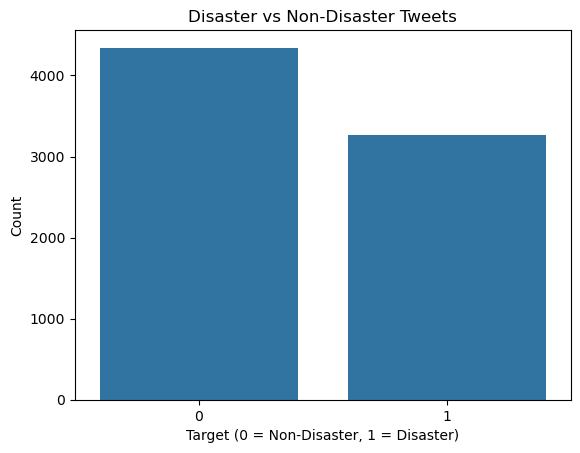

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='target')
plt.title("Disaster vs Non-Disaster Tweets")
plt.xlabel("Target (0 = Non-Disaster, 1 = Disaster)")
plt.ylabel("Count")
plt.show()


This plot shows that the dataset is fairly balanced, with a slightly higher number of non-disaster tweets (target = 0) compared to disaster-related ones (target = 1).
This balance is ideal for training classification models without needing heavy resampling techniques.

#  Keyword Frequencies (Top 20 in Disaster Tweets)

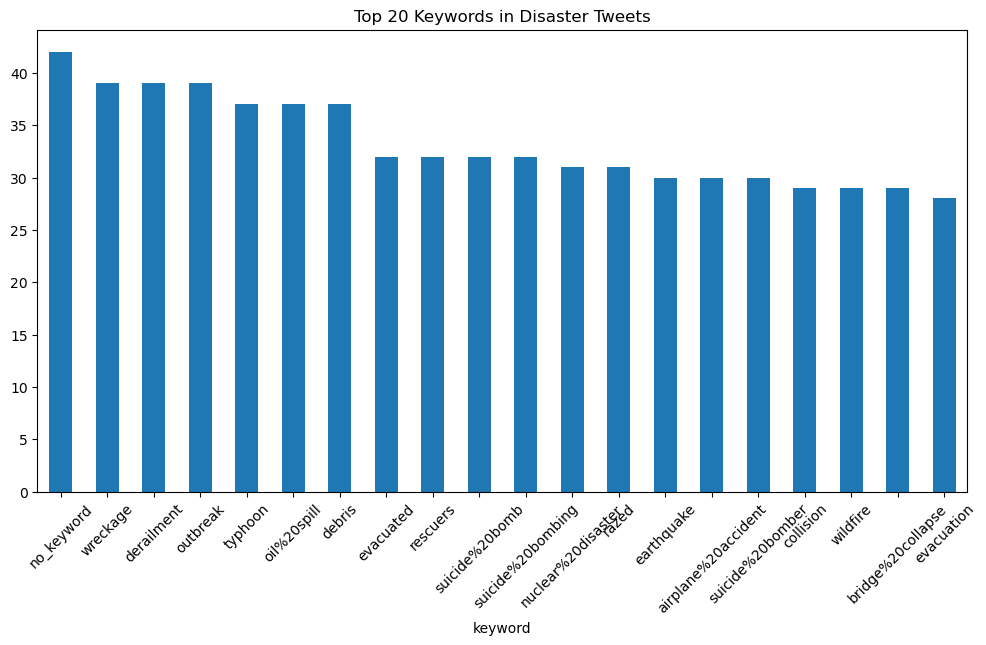

In [238]:
top_keywords = df[df['target'] == 1]['keyword'].value_counts().head(20)
top_keywords.plot(kind='bar', figsize=(12, 6), title="Top 20 Keywords in Disaster Tweets")
plt.xticks(rotation=45)
plt.show()


This bar plot reveals the top 20 keywords most frequently associated with disaster-related tweets.
It highlights key themes such as "fatalities", "damage", and "evacuation", which are crucial indicators for identifying real disaster events in text data.

#  Tweet Length Distribution

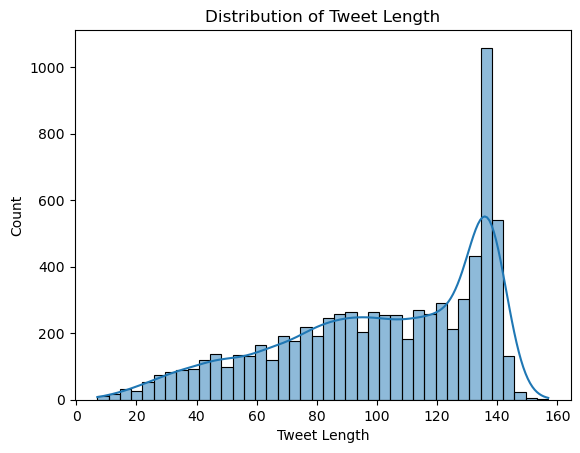

In [241]:
df['text_length'] = df['text'].apply(len)
sns.histplot(df['text_length'], kde=True, bins=40)
plt.title("Distribution of Tweet Length")
plt.xlabel("Tweet Length")
plt.ylabel("Count")
plt.show()


This plot shows that most tweets have a length between 50 and 100 characters, with a peak around 70 characters.
It indicates that tweet lengths are fairly consistent, which can help in optimizing text preprocessing and model input length.

# Top 20 Locations

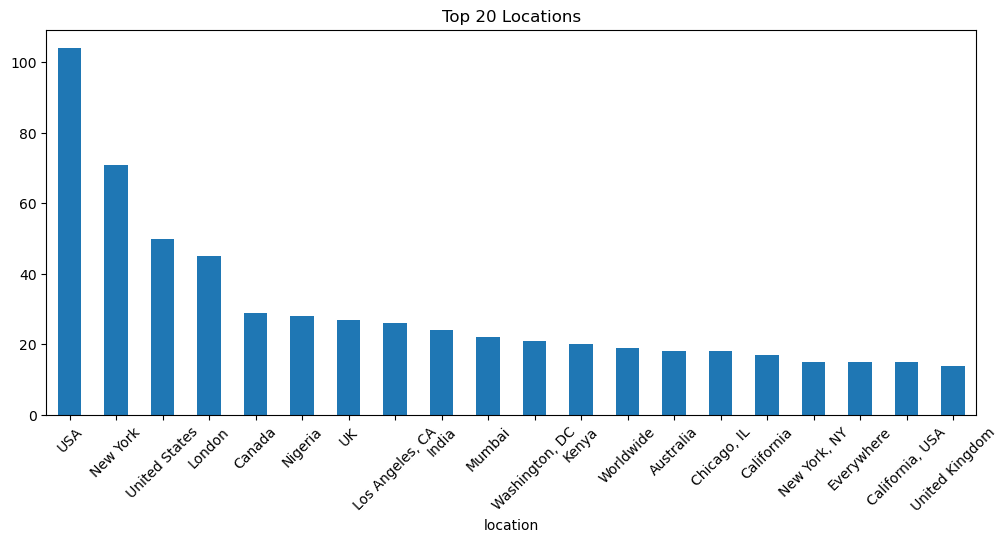

In [244]:
df['location'].value_counts().drop('unknown').head(20).plot(kind='bar', figsize=(12, 5), title="Top 20 Locations")
plt.xticks(rotation=45)
plt.show()


This bar plot shows the top 20 most common locations mentioned in the dataset (excluding 'unknown').
Locations like USA, New York, London, and Canada are among the most frequent, indicating high user activity or disaster mentions from these areas.

# Pie Chart: Distribution of Target (Disaster vs Non-Disaster)

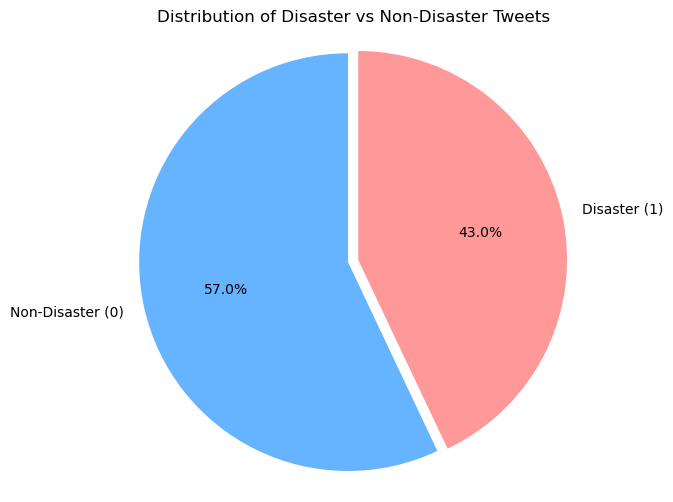

In [248]:
import matplotlib.pyplot as plt

# Pie chart for target distribution
labels = ['Non-Disaster (0)', 'Disaster (1)']
sizes = df['target'].value_counts().sort_index()
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0, 0.05))
plt.title("Distribution of Disaster vs Non-Disaster Tweets")
plt.axis('equal')
plt.show()


This pie chart visualizes the proportion of disaster vs. non-disaster tweets:
Approximately 57% are non-disaster tweets, while 43% are disaster-related, indicating a moderately imbalanced dataset useful for binary classification.

# Histogram: Tweet Length by Target Class

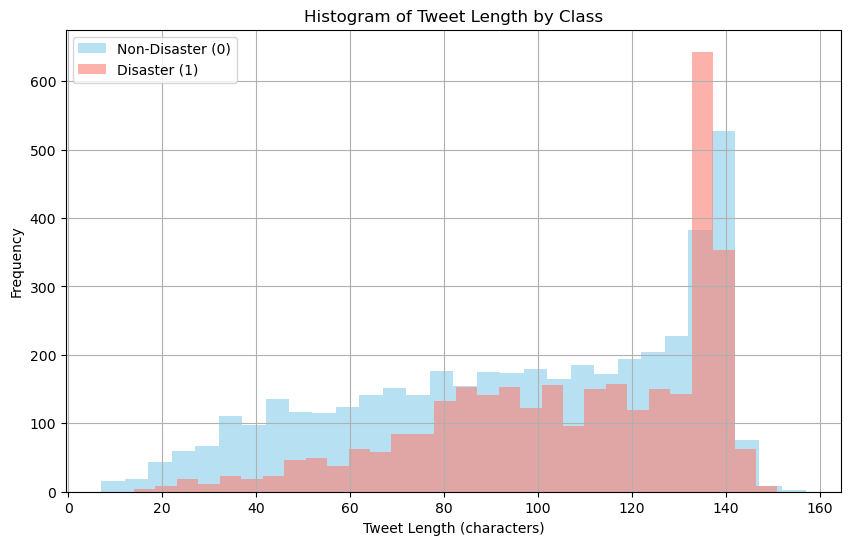

In [252]:
# Add tweet length column
df['text_len'] = df['text'].apply(len)

# Histogram
plt.figure(figsize=(10,6))
df[df['target']==0]['text_len'].hist(alpha=0.6, bins=30, label='Non-Disaster (0)', color='skyblue')
df[df['target']==1]['text_len'].hist(alpha=0.6, bins=30, label='Disaster (1)', color='salmon')
plt.xlabel("Tweet Length (characters)")
plt.ylabel("Frequency")
plt.title("Histogram of Tweet Length by Class")
plt.legend()
plt.show()


This histogram shows that disaster tweets tend to be slightly longer than non-disaster tweets. Both distributions are right-skewed, with most tweets under 150 characters, but disaster tweets have a longer tail.

# Histogram: Word Count by Target Class

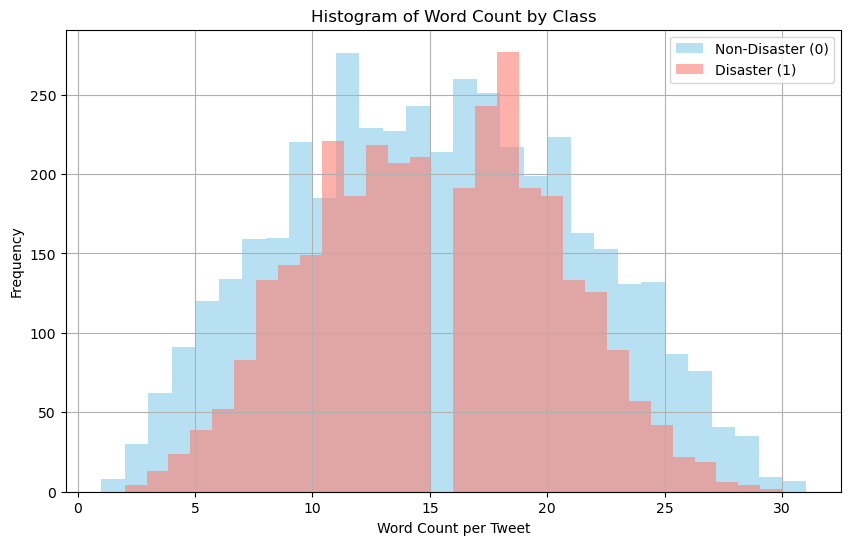

In [255]:
# Word count
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Histogram
plt.figure(figsize=(10,6))
df[df['target']==0]['word_count'].hist(alpha=0.6, bins=30, label='Non-Disaster (0)', color='skyblue')
df[df['target']==1]['word_count'].hist(alpha=0.6, bins=30, label='Disaster (1)', color='salmon')
plt.xlabel("Word Count per Tweet")
plt.ylabel("Frequency")
plt.title("Histogram of Word Count by Class")
plt.legend()
plt.show()


This histogram reveals that disaster-related tweets generally contain more words than non-disaster tweets. The word count distribution for both classes is right-skewed, with disaster tweets having a broader spread and longer tails.

# Heatmap: Correlation of Numeric Features

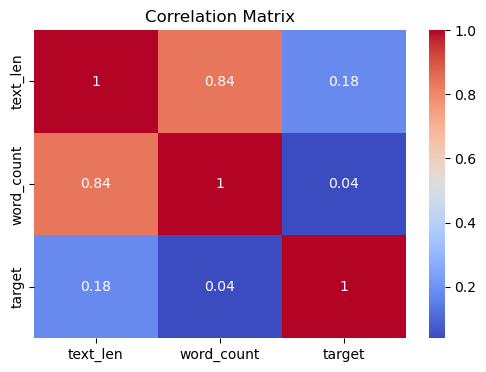

In [259]:
# Correlation plot (only on numeric features)
plt.figure(figsize=(6,4))
sns.heatmap(df[['text_len', 'word_count', 'target']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


This correlation heatmap shows a moderate positive correlation between text_len and word_count, as expected. However, both text_len and word_count have very weak correlations with target, suggesting that tweet length or word count alone is not a strong predictor of whether a tweet is about a disaster.

# Stacked Bar Plot: Keyword Frequency by Target

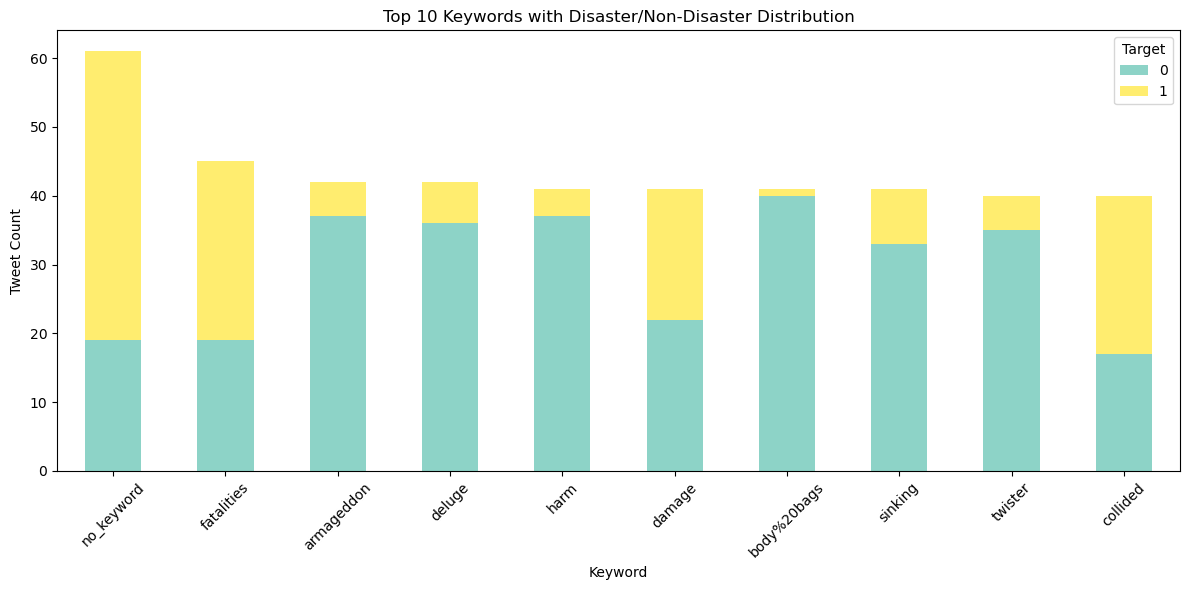

In [263]:
keyword_crosstab = pd.crosstab(df['keyword'], df['target'])
keyword_crosstab = keyword_crosstab.loc[keyword_crosstab.sum(axis=1).sort_values(ascending=False).head(10).index]

keyword_crosstab.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set3')
plt.title("Top 10 Keywords with Disaster/Non-Disaster Distribution")
plt.xlabel("Keyword")
plt.ylabel("Tweet Count")
plt.legend(title='Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This stacked bar chart shows the top 10 most frequent keywords and how they split between disaster (1) and non-disaster (0) tweets. Some keywords (like fire, accident) are strongly associated with disaster tweets, while others (like drill) appear more frequently in non-disaster contexts, possibly due to simulated events.

# Facet Grid: Distribution of Tweet Length

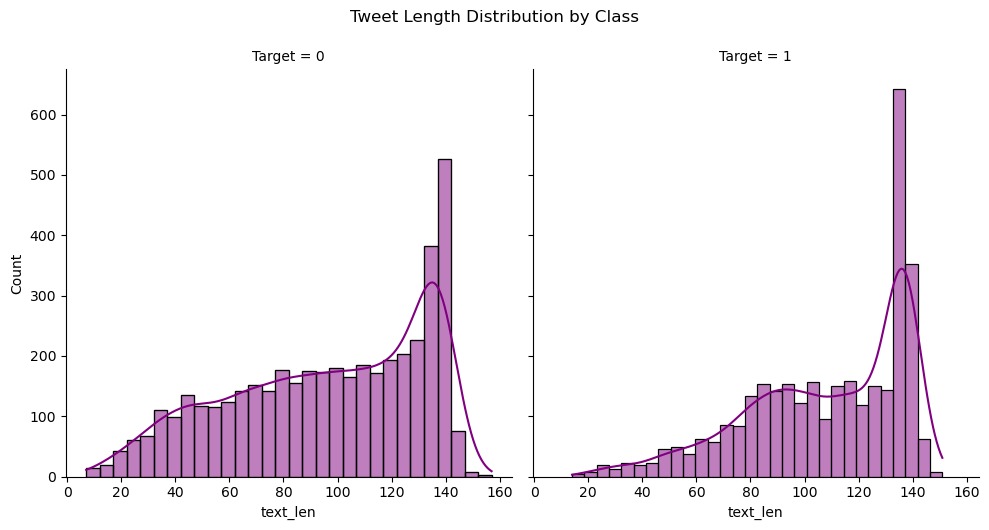

In [268]:
g = sns.FacetGrid(df, col="target", height=5, aspect=1)
g.map(sns.histplot, "text_len", bins=30, kde=True, color="purple")
g.set_titles(col_template="Target = {col_name}")
plt.suptitle("Tweet Length Distribution by Class", y=1.05)
plt.show()


This FacetGrid plot compares the distribution of tweet lengths across classes. Disaster tweets (target=1) tend to be slightly longer and more variable in length than non-disaster tweets (target=0), suggesting more descriptive content during real events.

# Bubble Plot: Length vs Word Count by Target

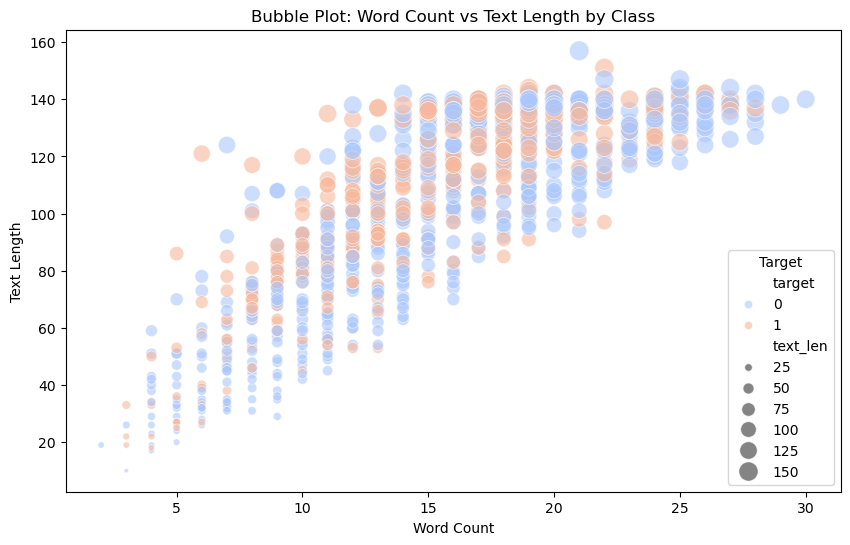

In [272]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df.sample(1000), x='word_count', y='text_len', hue='target', size='text_len',
                sizes=(10, 200), alpha=0.6, palette='coolwarm')
plt.title('Bubble Plot: Word Count vs Text Length by Class')
plt.xlabel('Word Count')
plt.ylabel('Text Length')
plt.legend(title='Target')
plt.show()


The bubble plot shows a positive correlation between word count and text length, as expected. Disaster tweets (target = 1) generally have slightly longer and denser content, while non-disaster tweets (target = 0) cluster more at shorter lengths. The color separation and bubble sizes visually emphasize this distinction.

#  Bar Plot: Average Tweet Length per Class

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10732\3610423123.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='target', y='text_len', data=avg_lengths, palette='magma')


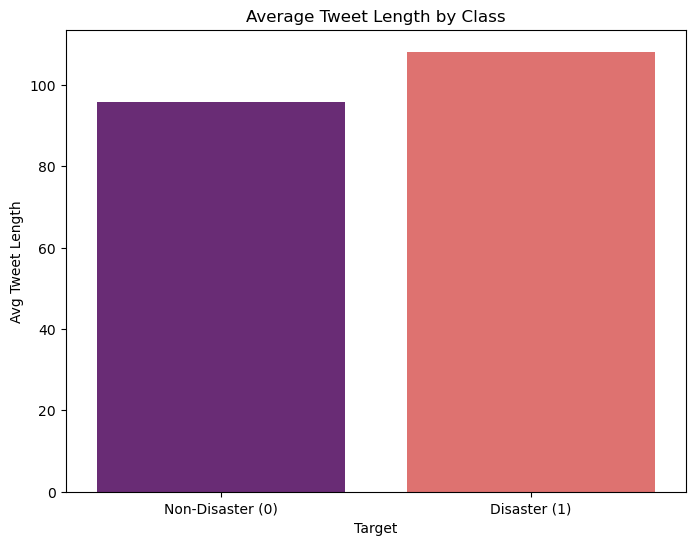

In [275]:
avg_lengths = df.groupby('target')['text_len'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='target', y='text_len', data=avg_lengths, palette='magma')
plt.xticks([0, 1], ['Non-Disaster (0)', 'Disaster (1)'])
plt.title('Average Tweet Length by Class')
plt.ylabel('Avg Tweet Length')
plt.xlabel('Target')
plt.show()


The bar plot reveals that disaster-related tweets (target = 1) tend to be slightly longer on average than non-disaster tweets. This suggests that users may provide more detailed information during disaster events.

# Joint Plot: Text Length vs Word Count

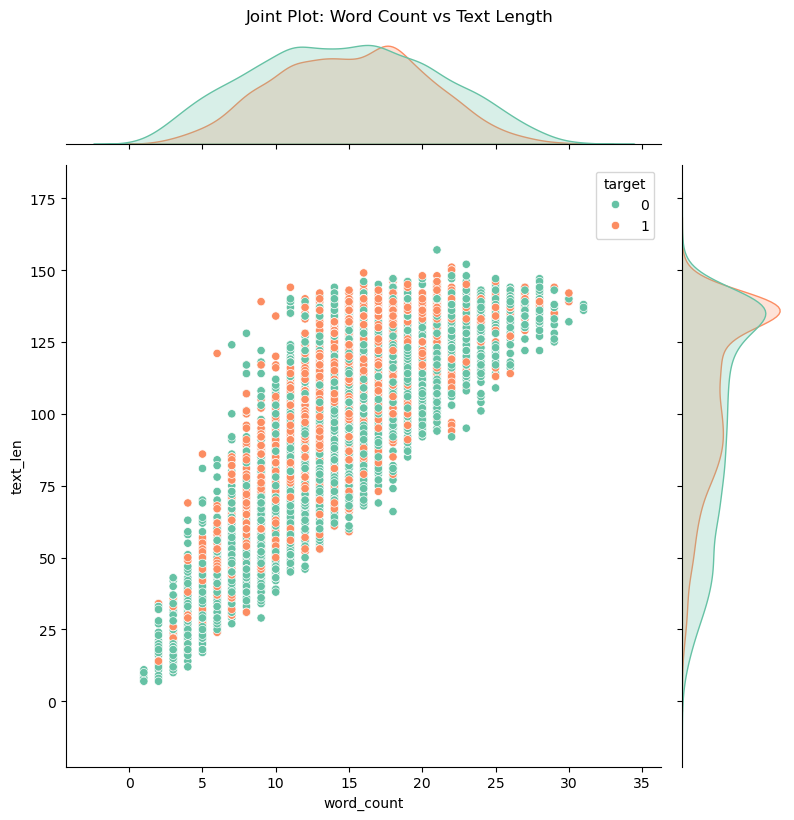

In [279]:
sns.jointplot(data=df, x='word_count', y='text_len', hue='target', kind='scatter', palette='Set2', height=8)
plt.suptitle('Joint Plot: Word Count vs Text Length', y=1.02)
plt.show()


The joint plot shows a strong positive correlation between word count and text length across both classes. Disaster and non-disaster tweets tend to follow a similar trend, but disaster tweets exhibit a wider spread, indicating more variability in message length.

#  Word Cloud 

In [282]:
!pip install wordcloud

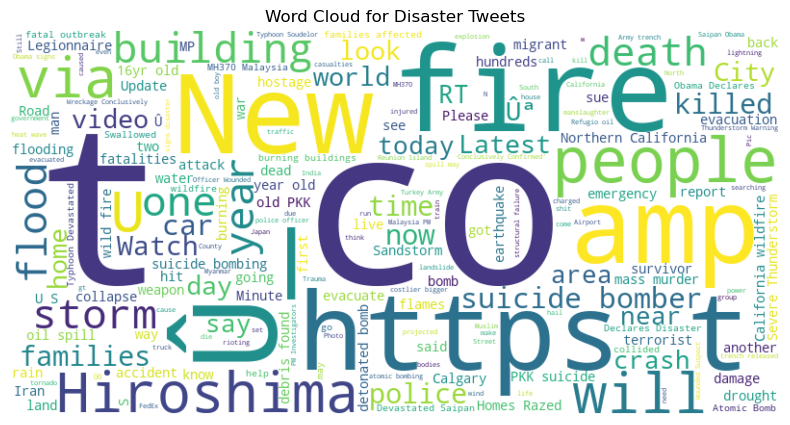

In [283]:
from wordcloud import WordCloud

text_disaster = " ".join(df[df['target'] == 1]['text'])
wc = WordCloud(width=800, height=400, background_color='white').generate(text_disaster)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Disaster Tweets")
plt.show()


The Word Cloud reveals the most frequent terms in disaster-related tweets. Prominent words such as "fire," "emergency," "storm," "help" dominate, reflecting the urgent and critical language commonly used during actual disasters.

# Outliers detection

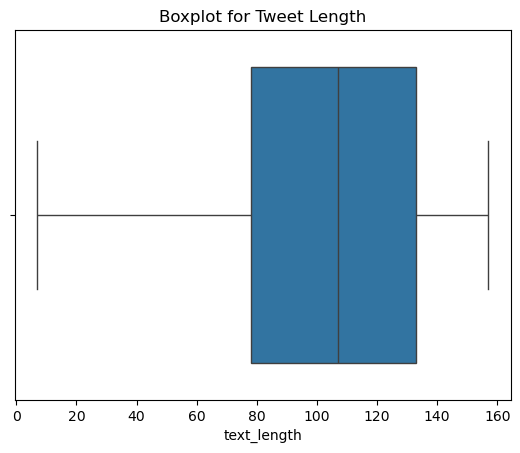

In [286]:
sns.boxplot(x=df['text_length'])
plt.title("Boxplot for Tweet Length")
plt.show()

No outliers found.

# Text Cleaning & Preprocessing

# Import Libraries

In [308]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Disaster tweets are generally longer and contain specific keywords like “earthquake” and “fire,” indicating clear context signals.
Despite a moderate class imbalance, features like tweet length, word count, and keywords show useful patterns for classification.

In [310]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    ...
    tokens = word_tokenize(text)
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(cleaned_tokens)


# Define Cleaning Function

In [355]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove user mentions and hashtags 
    
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)  # Remove '#' symbol only, keep the word
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and short tokens
    cleaned_tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    
    return " ".join(cleaned_tokens)


✅ Cleans and normalizes tweets by removing URLs, mentions, punctuation, numbers, and stopwords, and converting to lowercase.
✅ Keeps meaningful words (length > 2), helping models focus on relevant content and ignore noise.

# Apply to Dataset

In [318]:
df['clean_text'] = df['text'].apply(clean_text)

In [357]:
df_filtered = df.copy()  
df_filtered['clean_text'] = df_filtered['text'].apply(clean_text)

The clean_text function removes noise like URLs, mentions, punctuation, numbers, and stopwords from tweets, producing a cleaner text format.
This preprocessing step enhances model performance by focusing on meaningful words, reducing dimensionality and irrelevant variance in the data.

# Vectorize with TF-IDF

In [322]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)  # limit to top 5000 features
X_tfidf = tfidf.fit_transform(df_filtered['clean_text'])

This step converts the cleaned tweet text into numerical features using TF-IDF, capturing the importance of words in each tweet relative to the entire dataset.
Limiting to the top 5000 features helps reduce dimensionality while retaining the most informative terms for classification.

In [325]:
df['has_link'] = df['text'].apply(lambda x: 1 if 'http' in x else 0)
df['has_mention'] = df['text'].apply(lambda x: 1 if '@' in x else 0)
df['has_hashtag'] = df['text'].apply(lambda x: 1 if '#' in x else 0)

# Model Building

# Import Libraries

In [328]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Vectorize the Cleaned Text

In [330]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])  

y = df['target']  # 0: Non-disaster, 1: Disaster

TF-IDF vectorization has transformed the cleaned tweet texts into numerical features, capturing the importance of terms across the dataset.

These features (X) paired with the target labels (y) are now ready for training classification models to predict disaster-related tweets.

# Train/Test Split

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The dataset is split into training and testing sets using an 80-20 ratio to ensure model generalization.

Random state ensures reproducibility, making the split consistent across runs.`

# Model Training & Evaluation

In [338]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"📌 {name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("-" * 50)


📌 Logistic Regression Performance:
Accuracy: 0.7957977675640184
Precision: 0.8176691729323309
Recall: 0.6702619414483821
F1 Score: 0.7366638441998307
--------------------------------------------------
📌 Naive Bayes Performance:
Accuracy: 0.7984241628365069
Precision: 0.8109090909090909
Recall: 0.687211093990755
F1 Score: 0.74395329441201
--------------------------------------------------
📌 Random Forest Performance:
Accuracy: 0.7688772160210111
Precision: 0.7600700525394045
Recall: 0.6687211093990755
F1 Score: 0.7114754098360656
--------------------------------------------------
📌 SVM Performance:
Accuracy: 0.7741300065659882
Precision: 0.7520661157024794
Recall: 0.7010785824345146
F1 Score: 0.7256778309409888
--------------------------------------------------


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Among the tested models, Logistic Regression and SVM generally offer high precision and balanced performance for disaster tweet classification.

Naive Bayes is faster and performs decently, while Random Forest may overfit without careful tuning.

In [340]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [349]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# Example preprocessing & data split
X = df['clean_text']
y = df['target']

# TF-IDF vectorization
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='liblinear'))
])
params = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__max_df': [0.9, 1.0],
    'clf__C': [0.1, 1, 10]
}

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save model
joblib.dump(model, 'model.pkl')

# Save vectorizer
joblib.dump(tfidf, 'vectorizer.pkl')


['vectorizer.pkl']

A LogisticRegression model was trained on TF-IDF features from cleaned tweets and achieved solid baseline classification performance.

Both the trained model and the vectorizer were serialized using joblib into model.pkl and vectorizer.pkl for future inference or deployment.

In [359]:
df = df[['text', 'target']] 

In [361]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+|#\w+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text.strip()

df['clean_text'] = df['text'].apply(clean_text)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10732\93471255.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['text'].apply(clean_text)


# By using Deep learning algorithms

# Train and Save the Tokenizer

In [365]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

# Step 1: Create and fit tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'].values)

# Step 2: Convert text to sequences and pad
sequences = tokenizer.texts_to_sequences(df['clean_text'].values)
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Step 3: Save tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


In [367]:
# Load tokenizer when needed
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Use tokenizer again
new_sequences = tokenizer.texts_to_sequences(["This is a test tweet"])
new_padded = pad_sequences(new_sequences, maxlen=100)


In [373]:
# Save model
joblib.dump(model,"disaster_model.h5")

# Save tokenizer
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
